# **Exploratory Data Analysis**

In [19]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from collections import Counter
from PIL import Image
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load dataset

In [3]:
images_path = '/content/drive/MyDrive/Flicker8k_Dataset'
captions_path = '/content/drive/MyDrive/Flickr8k_text/Flickr8k.token.txt'

images = os.listdir(images_path)
print('Number of images in the dataset:{}'.format(len(images)))

Number of images in the dataset:16159


# Create dataset with image filenames and corresponding captions

In [5]:
# mapping the images and captions
file = open(captions_path, 'r', encoding='utf8')
text = file.read()
file.close()

images_captions = []
for line in text.split('\n'):
    col = line.split('\t')
    if len(col) == 1:
        continue
    w = col[0].split("#") # Splitting the caption dataset at the required position
    # print(w)
    images_captions.append(w + [col[1].lower()])
# print(datatxt)

df_dataset = pd.DataFrame(images_captions,columns=["filename","index","caption"])
df_dataset = df_dataset[["index","filename","caption"]]
df_dataset.head()

,index,filename,caption
0,0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...
1,1,1000268201_693b08cb0e.jpg,a girl going into a wooden building .
2,2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .
3,3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...
4,4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...


In [6]:
print("Dataset details:")
print("Number of unique images:",len(np.unique(df_dataset.filename.values)))
print("Total number of captions for all images:", len(df_dataset))
print("Total number of captions for each image:", Counter(Counter(df_dataset.filename.values).values()))

# print(df_txt[:5])

Dataset details:
Number of unique images: 8092
Total number of captions for all images: 40460
Total number of captions for each image: Counter({5: 8092})


# Display 5 images with its captions

In [7]:
# Extracting 5 unique images
unique_image_filenames = []

image_row = df_dataset[df_dataset['index'] == '0'][:5]
for i in range(len(image_row)):
  unique_image_filenames.append(image_row.iloc[i]['filename'])

In [12]:
filename_counts = df_dataset['filename'].value_counts()
filename_counts

filename
1000268201_693b08cb0e.jpg    5
3388094307_5a83be64a5.jpg    5
3393394134_0caac47e1c.jpg    5
3393343330_b13df4d8ec.jpg    5
3393152604_27bd1037f2.jpg    5
                            ..
2699426519_228719b1db.jpg    5
2699342860_5288e203ea.jpg    5
2699125097_c6801d80ed.jpg    5
269898095_d00ac7d7a4.jpg     5
997722733_0cb5439472.jpg     5
Name: count, Length: 8092, dtype: int64

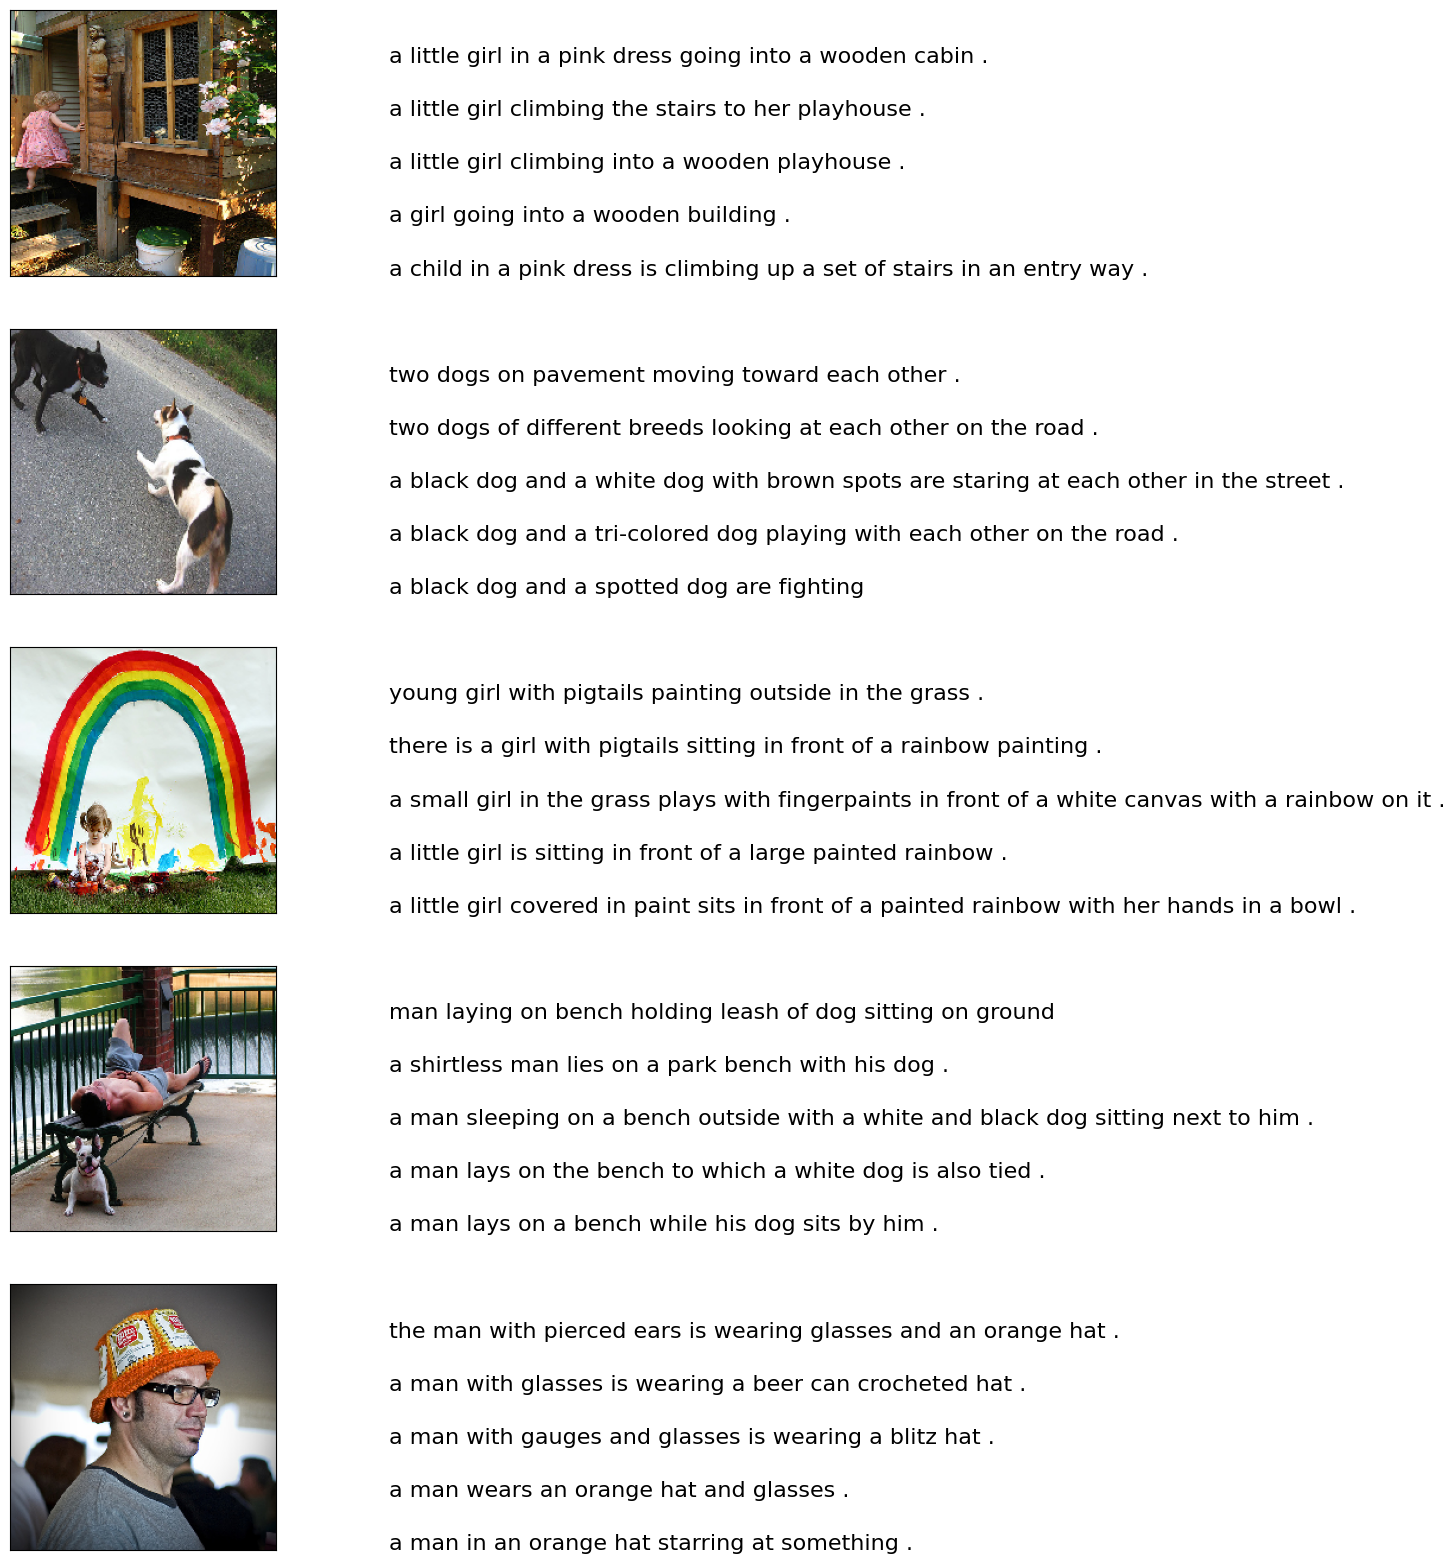

In [8]:
from keras.preprocessing.image import load_img, img_to_array
from IPython.display import display
from PIL import Image

npic = 5  # Displaying 5 images from the dataset
npix = 224
target_size = (npix, npix, 3)

count = 1
fig = plt.figure(figsize=(10,20))

for jpgfnm in unique_image_filenames:
    filename = images_path + '/' + jpgfnm
    captions = list(df_dataset["caption"].loc[df_dataset["filename"]==jpgfnm].values)
    image_load = load_img(filename, target_size=target_size)

    ax = fig.add_subplot(npic, 2, count, xticks=[], yticks=[])
    ax.imshow(image_load)
    count += 1

    ax = fig.add_subplot(npic, 2 , count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0, len(captions))
    for i, caption in enumerate(captions):
        ax.text(0, i, caption, fontsize=16)
    count += 1
plt.show()

# EDA of Images

Visulaize the distribution of dimensions of the images in the dataset

In [9]:
image_sizes = []
for filename in os.listdir(images_path):
    img_path = os.path.join(images_path, filename)
    try:
        img = Image.open(img_path)
        width, height = img.size
        image_sizes.append((width, height))
    except:
        print(f"Skipping {filename} due to an error.")

Skipping Flickr_8k (1).testImages.txt due to an error.
Skipping Flickr_8k.testImages.txt due to an error.


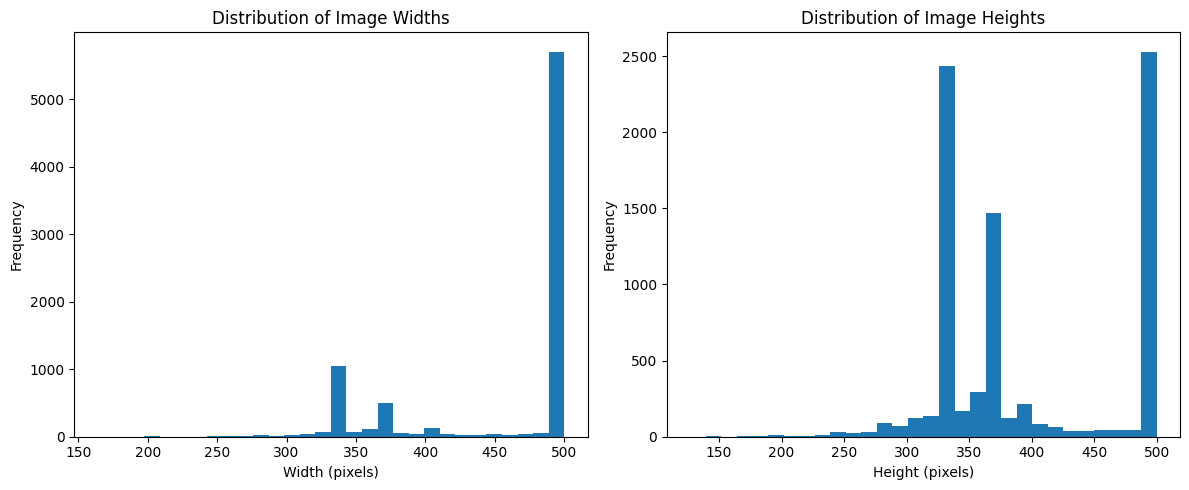

In [14]:
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30)
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

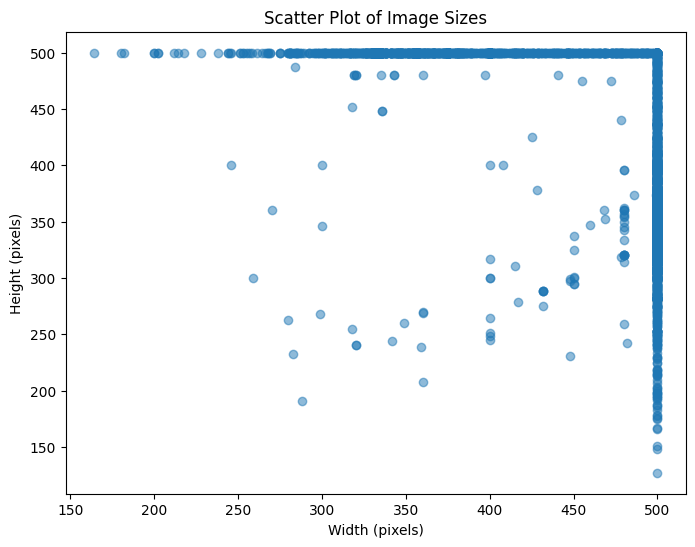

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Scatter Plot of Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.show()

Visualize the color distribution of the images in the dataset

In [16]:
def calculate_color_histogram(image_path):
    """Calculates the color histogram of an image."""
    image = cv2.imread(image_path)
    if image is None:
        return None  # Handle cases where the image cannot be read

    # Convert BGR to RGB (matplotlib uses RGB)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate histograms for each color channel
    hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

    return hist_r, hist_g, hist_b

In [20]:
histograms = []

for filename in os.listdir(images_path):
    if filename.endswith('.jpg'):
        image_path = os.path.join(images_path, filename)
        histogram = calculate_color_histogram(image_path)
        if histogram is not None:
            histograms.append(histogram)

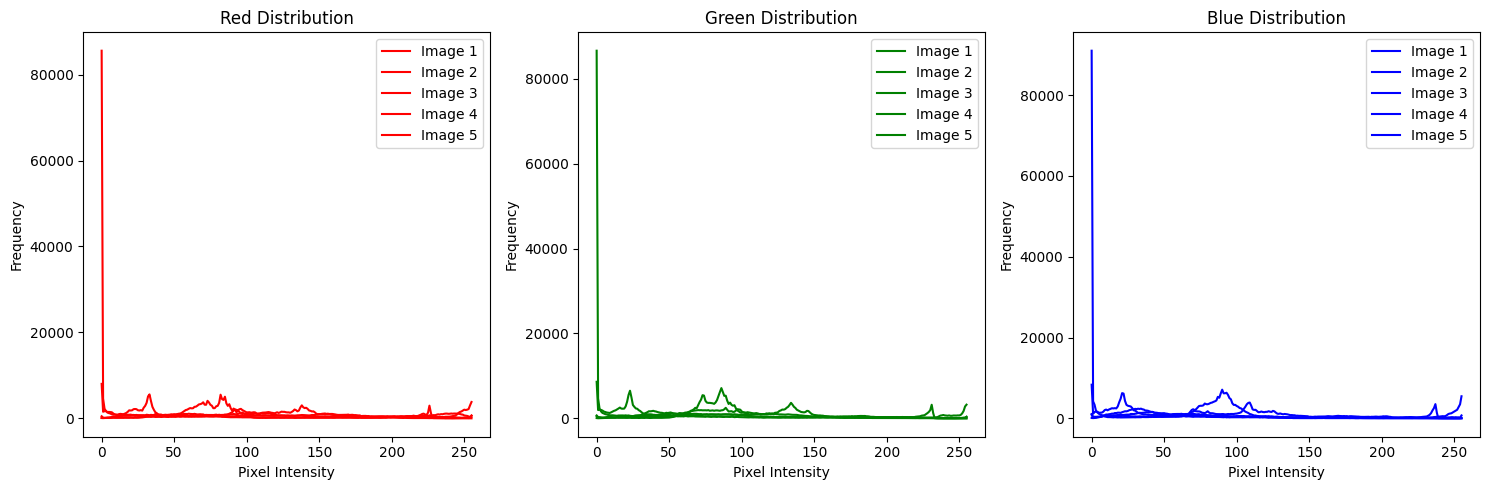

In [23]:
# Create subplots for R, G, and B distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
num_samples = 5

for i in range(num_samples):
  hist_r, hist_g, hist_b = histograms[i]
  axes[0].plot(hist_r, color='red', label=f'Image {i+1}')
  axes[1].plot(hist_g, color='green', label=f'Image {i+1}')
  axes[2].plot(hist_b, color='blue', label=f'Image {i+1}')

# Set titles and labels for each subplot
axes[0].set_title('Red Distribution')
axes[0].set_xlabel('Pixel Intensity')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].set_title('Green Distribution')
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')
axes[1].legend()

axes[2].set_title('Blue Distribution')
axes[2].set_xlabel('Pixel Intensity')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.show()

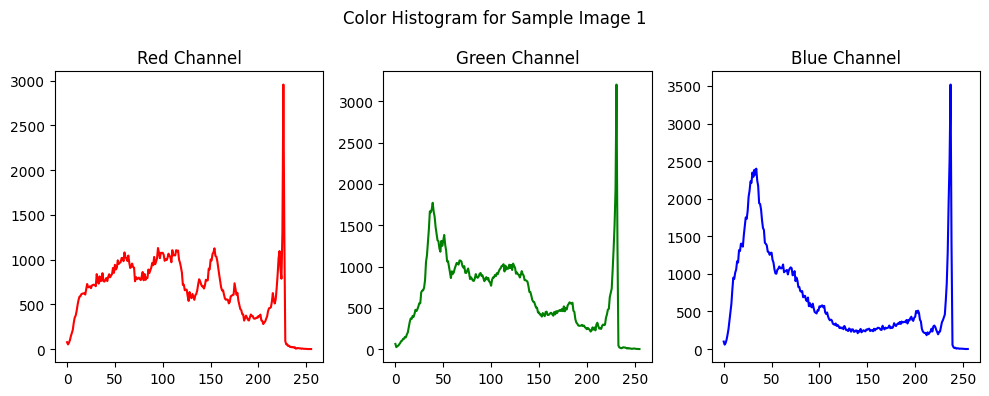

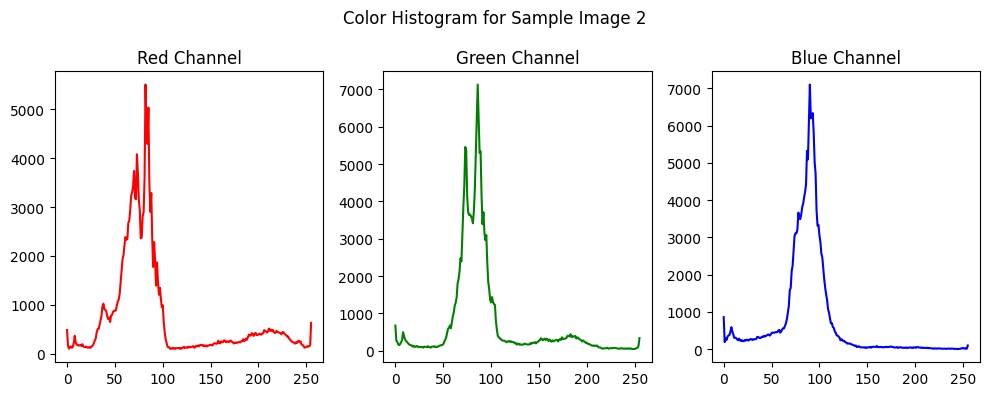

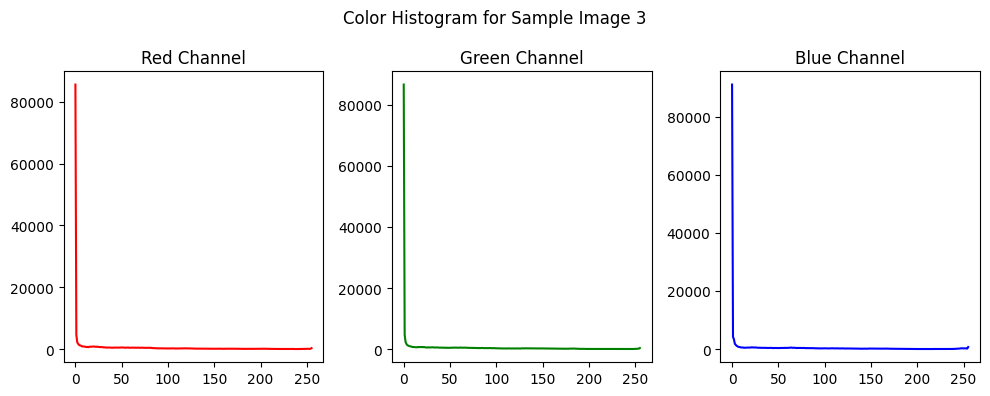

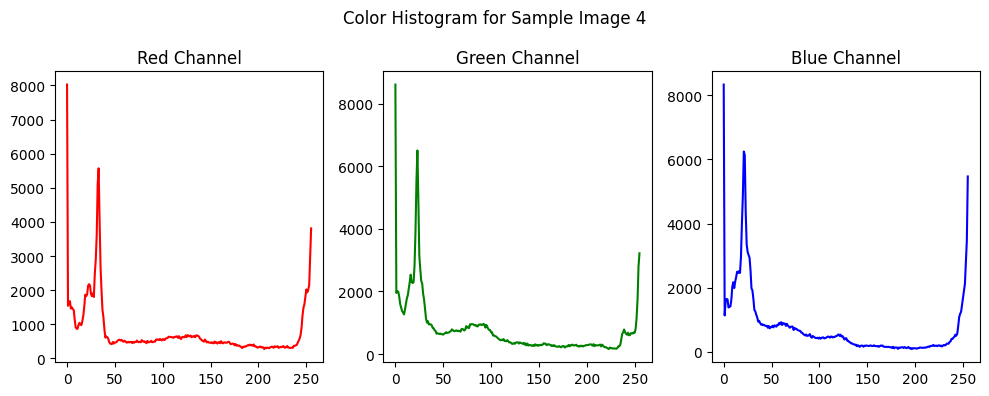

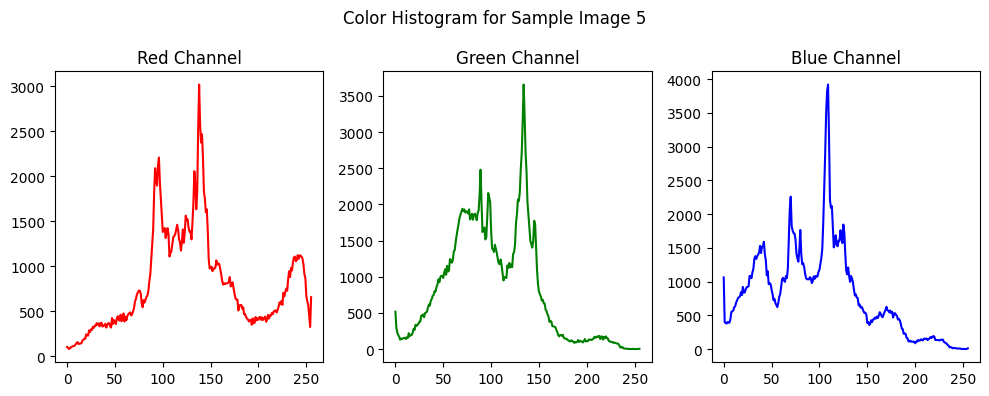

In [21]:
# Plot histograms for a few sample images
num_samples = 5
for i in range(num_samples):
    hist_r, hist_g, hist_b = histograms[i]
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.plot(hist_r, color='red')
    plt.title('Red Channel')
    plt.subplot(1, 3, 2)
    plt.plot(hist_g, color='green')
    plt.title('Green Channel')
    plt.subplot(1, 3, 3)
    plt.plot(hist_b, color='blue')
    plt.title('Blue Channel')
    plt.suptitle(f'Color Histogram for Sample Image {i+1}')
    plt.tight_layout()
    plt.show()

# EDA of Text Data

Visualize the plot of number of words and word frequency in the all the captions

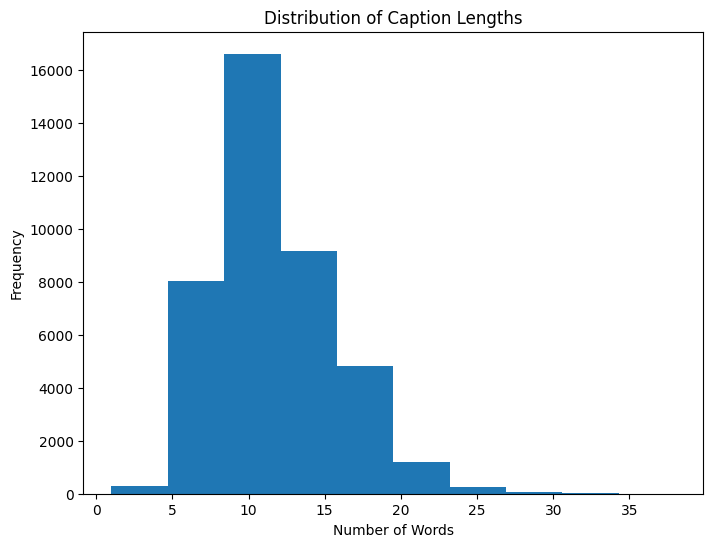

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
# displays the number of captions that fall in the bin of the length of the captions
# Calculate caption lengths
df_dataset['caption_length'] = df_dataset['caption'].apply(lambda x: len(x.split()))

# Plot histogram of caption lengths
plt.figure(figsize=(8, 6))
plt.hist(df_dataset['caption_length'], bins=10)
plt.title('Distribution of Caption Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [25]:
df_dataset.head()

,index,filename,caption,caption_length
0,0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...,18
1,1,1000268201_693b08cb0e.jpg,a girl going into a wooden building .,8
2,2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .,9
3,3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...,10
4,4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...,13


Display top 20 most frequent words in all the captions.

         frequency
word              
a            62989
in           18975
the          18419
on           10744
is            9345
and           8852
dog           8136
with          7765
man           7266
of            6713
two           5639
white         3940
black         3832
boy           3581
are           3505
woman         3403
girl          3328
to            3173
wearing       3062
at            2915


<Figure size 1200x600 with 0 Axes>

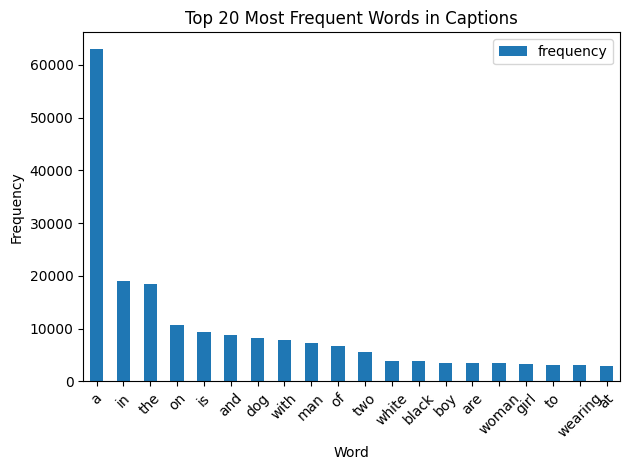

In [31]:
import string

# Combine all captions into a single string
all_captions = ' '.join(df_dataset['caption'].tolist())
all_captions_nopunct = ''.join([char for char in all_captions if char not in string.punctuation])
# Tokenize the captions (split into words)
words = all_captions_nopunct.lower().split()  # Convert to lowercase for consistency

# Count word frequencies
word_counts = Counter(words)

# Create a DataFrame from word counts for easier manipulation
df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['frequency'])
df_word_counts.index.name = 'word'
df_word_counts.sort_values('frequency', ascending=False, inplace=True)

# Print the top N most frequent words
N = 20
print(df_word_counts.head(N))

# Plot a bar chart of the most frequent words
plt.figure(figsize=(12, 6))
df_word_counts.head(N).plot(kind='bar')
plt.title('Top 20 Most Frequent Words in Captions')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Print unique words in all the captions

In [33]:
unique_words = set(all_captions_nopunct)

vocabulary_size = len(unique_words)
print("Vocabulary Size:", vocabulary_size)

Vocabulary Size: 37


N-gram analysis: Display top 10 most frequent bigrams and trigrams in all the captions.

Top 10 most frequent bigrams:
('in', 'a') 6482
('on', 'a') 5346
('in', 'the') 5056
('a', 'man') 5054
('with', 'a') 3300
('on', 'the') 2504
('of', 'a') 2390
('a', 'woman') 2193
('a', 'dog') 1989
('a', 'black') 1986

Top 10 most frequent trigrams:
('in', 'front', 'of') 1304
('a', 'man', 'in') 1087
('a', 'group', 'of') 1058
('front', 'of', 'a') 876
('man', 'in', 'a') 847
('a', 'black', 'dog') 749
('a', 'brown', 'dog') 741
('and', 'white', 'dog') 735
('in', 'the', 'snow') 671
('in', 'the', 'air') 669


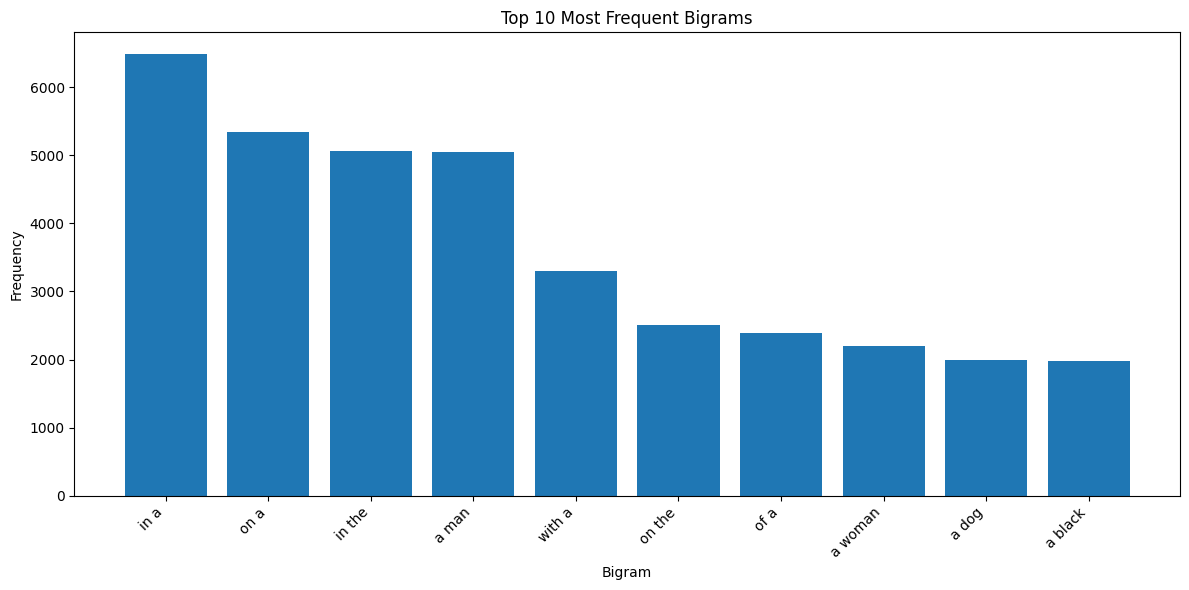

In [36]:
from nltk import ngrams

def analyze_ngrams(df, n):
    """Analyzes the frequency of n-grams in the captions."""
    all_captions = ' '.join(df['caption'].tolist())
    all_captions = ''.join([word for word in all_captions if word not in string.punctuation])
    tokens = all_captions.lower().split()
    n_grams = ngrams(tokens, n)
    ngram_counts = Counter(n_grams)
    return ngram_counts

# Analyze bigrams (n=2)
bigram_counts = analyze_ngrams(df_dataset, 2)
print("Top 10 most frequent bigrams:")
for ngram, count in bigram_counts.most_common(10):
    print(ngram, count)

# Analyze trigrams (n=3)
trigram_counts = analyze_ngrams(df_dataset, 3)
print("\nTop 10 most frequent trigrams:")
for ngram, count in trigram_counts.most_common(10):
    print(ngram, count)

# Plot the most frequent bigrams
top_bigrams = bigram_counts.most_common(10)
bigram_labels = [' '.join(ngram) for ngram, _ in top_bigrams]
bigram_values = [count for _, count in top_bigrams]

plt.figure(figsize=(12, 6))
plt.bar(bigram_labels, bigram_values)
plt.title('Top 10 Most Frequent Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
def analyze_ngrams_for_image(df, filename, n):
    """Analyzes n-grams for captions associated with a specific image."""
    image_captions = df[df['filename'] == filename]['caption'].tolist()
    all_captions_text = ' '.join(image_captions)
    tokens = all_captions_text.lower().split()
    n_grams = ngrams(tokens, n)
    ngram_counts = Counter(n_grams)
    return ngram_counts

# Example: Analyze bigrams for a specific image
filename = df_dataset.iloc[0]['filename']  # Replace with the actual filename
bigram_counts = analyze_ngrams_for_image(df_dataset, filename, 2)

print(f"Top 5 bigrams for image {filename}:")
for ngram, count in bigram_counts.most_common(5):
    print(ngram, count)

Top 5 bigrams for image 1000268201_693b08cb0e.jpg:
('.', 'a') 4
('into', 'a') 3
('a', 'wooden') 3
('a', 'little') 3
('little', 'girl') 3


In [39]:
!pip freeze > requirements.txt